**LENDING CLUB CASE STUDY**

In [64]:
import os
os.getcwd()

'C:\\Users\\Vinay\\LENDING CLUB CASE STUDY'

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [66]:
#Read the csv file
data = pd.read_csv("loan.csv")

In [67]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [68]:
data.shape

(39717, 111)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [70]:
#Checking for null values in all the column
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Removing the null columns first.

In [71]:
#Removing the null values and dropping the columns which has null value
data.dropna(axis=1, how = "all", inplace = True)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

-  From these 56 columns there are again few columns which have nothing to do with our analysis.
1. We are analyzing the driving factors of loan defaulting before approving loan.
2. We will safely extract the columns and index needed for our analysis.
3. Irrelevant columns should be removed first from our analysis point of view.

-  List of irrelevant columns:

1.This is irrelevant personal data of customer -
  a["id"],
  b.["member_id"],
  c.["url"],
  d.["zipcode"],
  e.["addr_state"],
  f.["desc" ]
  g.["emp_title"]

2.This data is related to investor analysis -
  a.["out_prncp_inv"],
  b.["total_pymnt_inv"]
  
3.Post Aprroval Feature - 
  a.["delinq_2yrs"],
  b.["out_prncp"],
  c.["total_rec_late_fee"],
  d.["total_pymnt"],
  e.["total_rec_prncp"],
  f.["total_rec_int"],
  g.["recoveries"],
  h.["collection_recovery_fee" ],
  i.["last_pymnt_d"],
  j.["next_pymnt_d"],
  k.["last_pymnt_amnt"],
  l.["chargeoff_within_12_mths"],
  m.["mths_since_last_delinq"],
  n.["mths_since_last_record"]

In [73]:
#dropping columns ["mths_since_last_delinq","mths_since_last_record","next_pymnt_d","id","member_id"]
data = data.drop(["mths_since_last_delinq","mths_since_last_record","next_pymnt_d","id","member_id"], axis = 1)

In [74]:
#dropping columns ["desc","url","zip_code","addr_state","last_credit_pull_d"]
data = data.drop(["desc","url","zip_code","addr_state","last_credit_pull_d"], axis = 1)

In [75]:
#dropping columns ["out_prncp_inv", "total_pymnt_inv"]
data = data.drop(["out_prncp_inv", "total_pymnt_inv"], axis = 1)

In [76]:
#dropping columns ["out_prncp","total_rec_late_fee","total_pymnt","total_rec_prncp","total_rec_int","recoveries"]
data = data.drop(["out_prncp","total_rec_late_fee","total_pymnt","total_rec_prncp","total_rec_int","recoveries"], axis = 1)

In [77]:
#dropping columns ["collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","chargeoff_within_12_mths"]
data = data.drop(["collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","chargeoff_within_12_mths"], axis = 1)

In [78]:
#dropping columns ["emp_title"]
data = data.drop(["emp_title"], axis = 1)

In [79]:
#dropping columns ["funded_amnt","initial_list_status","collections_12_mths_ex_med","policy_code"]
data = data.drop(["funded_amnt","initial_list_status","collections_12_mths_ex_med","policy_code"], axis = 1)

In [80]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,3,0,13648,83.70%,9,INDIVIDUAL,0,0,0.0,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,3,0,1687,9.40%,4,INDIVIDUAL,0,0,0.0,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,2,0,2956,98.50%,10,INDIVIDUAL,0,0,0.0,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,10,0,5598,21%,37,INDIVIDUAL,0,0,0.0,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,15,0,27783,53.90%,38,INDIVIDUAL,0,0,0.0,0.0


In [81]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

-  Our goal is likely to know who is going to default in paying the loan. Customers with Fully paid or Charged off loan status will give us the idea for our analysis.
Hence we should drop the one who falls under the category of "Current" in loan status.


In [82]:
#Extracting rows for column where loan status is not "Current" 
data[data.loan_status != "Current"]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,3,0,13648,83.70%,9,INDIVIDUAL,0,0,0.0,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,3,0,1687,9.40%,4,INDIVIDUAL,0,0,0.0,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,2,0,2956,98.50%,10,INDIVIDUAL,0,0,0.0,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,10,0,5598,21%,37,INDIVIDUAL,0,0,0.0,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,9,0,7963,28.30%,12,INDIVIDUAL,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,...,13,0,7274,13.10%,40,INDIVIDUAL,0,0,NaN,NaN
39713,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,...,6,0,8847,26.90%,9,INDIVIDUAL,0,0,NaN,NaN
39714,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,...,11,0,9698,19.40%,20,INDIVIDUAL,0,0,NaN,NaN
39715,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,...,17,0,85607,0.70%,26,INDIVIDUAL,0,0,NaN,NaN


In [83]:
#Updating dataframe to fetch only the rows where loan status is not current
data = data[data.loan_status != "Current"]

In [84]:
data.head

<bound method NDFrame.head of        loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0           5000           4975.0   36 months   10.65%       162.87     B   
1           2500           2500.0   60 months   15.27%        59.83     C   
2           2400           2400.0   36 months   15.96%        84.33     C   
3          10000          10000.0   36 months   13.49%       339.31     C   
5           5000           5000.0   36 months    7.90%       156.46     A   
...          ...              ...         ...      ...          ...   ...   
39712       2500           1075.0   36 months    8.07%        78.42     A   
39713       8500            875.0   36 months   10.28%       275.38     C   
39714       5000           1325.0   36 months    8.07%       156.84     A   
39715       5000            650.0   36 months    7.43%       155.38     A   
39716       7500            800.0   36 months   13.75%       255.43     E   

      sub_grade emp_length home_ownership  an

In [85]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [86]:
#checking percentage of null values in all the columns
(data.isna().sum()/len(data.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
pymnt_plan              0.000000
purpose                 0.000000
title                   0.028514
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
application_type        0.000000
acc_now_delinq          0.000000
delinq_amnt             0.000000
pub_rec_bankruptcies    1.806776
tax_liens               0.101097
dtype: flo

Handling Missing Columns

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  pymnt_plan            38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title              

Employment length has 2% missing values here to predict this missing values we can use Mode function.

In [88]:
#Finding the mode of employee length column
data["emp_length"].mode()[0]

'10+ years'

In [89]:
#Replacing null value with Mode of the Employee Length column
data["emp_length"] = data["emp_length"].fillna(data["emp_length"].mode()[0])

In [90]:
data.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

-  As we can see there are 0.1% missing values in "revol_util" using Mean, Median or Mode won't help us for this particular column so its better to drop the index with missing values.

In [91]:
data.revol_util.isna().sum()

50

In [92]:
#dropping the null values in revol_util column
data.dropna(axis = 0, subset = ["revol_util"], inplace = True)

In [93]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,3,0,13648,83.70%,9,INDIVIDUAL,0,0,0.0,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,3,0,1687,9.40%,4,INDIVIDUAL,0,0,0.0,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,2,0,2956,98.50%,10,INDIVIDUAL,0,0,0.0,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,10,0,5598,21%,37,INDIVIDUAL,0,0,0.0,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,9,0,7963,28.30%,12,INDIVIDUAL,0,0,0.0,0.0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38527 non-null  int64  
 1   funded_amnt_inv       38527 non-null  float64
 2   term                  38527 non-null  object 
 3   int_rate              38527 non-null  object 
 4   installment           38527 non-null  float64
 5   grade                 38527 non-null  object 
 6   sub_grade             38527 non-null  object 
 7   emp_length            38527 non-null  object 
 8   home_ownership        38527 non-null  object 
 9   annual_inc            38527 non-null  float64
 10  verification_status   38527 non-null  object 
 11  issue_d               38527 non-null  object 
 12  loan_status           38527 non-null  object 
 13  pymnt_plan            38527 non-null  object 
 14  purpose               38527 non-null  object 
 15  title              

-  It is not a good idea to predict bankruptcies and title using Mean, Median or Mode so its better to drop rows corresponding to missing values.

In [95]:
#Checking the null values
data.pub_rec_bankruptcies.isna().sum()

697

In [96]:
#Dropping the null values from "pub_rec_bankruptcies" column
data.dropna(axis = 0, subset = ["pub_rec_bankruptcies"], inplace = True)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37830 entries, 0 to 39680
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37830 non-null  int64  
 1   funded_amnt_inv       37830 non-null  float64
 2   term                  37830 non-null  object 
 3   int_rate              37830 non-null  object 
 4   installment           37830 non-null  float64
 5   grade                 37830 non-null  object 
 6   sub_grade             37830 non-null  object 
 7   emp_length            37830 non-null  object 
 8   home_ownership        37830 non-null  object 
 9   annual_inc            37830 non-null  float64
 10  verification_status   37830 non-null  object 
 11  issue_d               37830 non-null  object 
 12  loan_status           37830 non-null  object 
 13  pymnt_plan            37830 non-null  object 
 14  purpose               37830 non-null  object 
 15  title              

In [98]:
data.title.isna().sum()

11

In [99]:
#Dropping the null values from title column
data.dropna(axis = 0, subset = ["title"], inplace = True)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37819 entries, 0 to 39680
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37819 non-null  int64  
 1   funded_amnt_inv       37819 non-null  float64
 2   term                  37819 non-null  object 
 3   int_rate              37819 non-null  object 
 4   installment           37819 non-null  float64
 5   grade                 37819 non-null  object 
 6   sub_grade             37819 non-null  object 
 7   emp_length            37819 non-null  object 
 8   home_ownership        37819 non-null  object 
 9   annual_inc            37819 non-null  float64
 10  verification_status   37819 non-null  object 
 11  issue_d               37819 non-null  object 
 12  loan_status           37819 non-null  object 
 13  pymnt_plan            37819 non-null  object 
 14  purpose               37819 non-null  object 
 15  title              

-  There are no missing values now in any columns, So here we have completed dealing with missing values.
Now we will analyze columns if they are having any special characters(%,<) in them.

In [101]:
#Cleaning and converting the column revol_util
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x: x.split("%")[0]))

In [102]:
#Cleaning and converting the column int_rate
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x: x.split("%")[0]))

In [103]:
#Cleaning and converting the column emp_length
data.emp_length = pd.to_numeric(data.emp_length.apply(lambda x: 0 if "<" in x else (x.split("+")[0] if "+" in x else x.split()[0]) ))

In [104]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,3,0,13648,83.7,9,INDIVIDUAL,0,0,0.0,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,3,0,1687,9.4,4,INDIVIDUAL,0,0,0.0,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,0,2956,98.5,10,INDIVIDUAL,0,0,0.0,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,10,0,5598,21.0,37,INDIVIDUAL,0,0,0.0,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,9,0,7963,28.3,12,INDIVIDUAL,0,0,0.0,0.0


_"Outlier Treatment"_

In [105]:
#Removing outliers from int_rate
data=data[data['int_rate']<22]

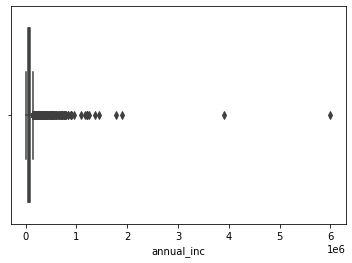

In [106]:
#outlier check for annual_inc
sns.boxplot(data["annual_inc"])
plt.show()

In [107]:
#from the boxplot there is clear indication of outliers
quantile_annual_inc = data.annual_inc.quantile([0.25,0.50,0.75,0.90,0.92,0.95,0.98,0.99])
quantile_annual_inc

0.25     40000.0
0.50     58868.0
0.75     82000.0
0.90    115000.0
0.92    122000.0
0.95    140000.0
0.98    185000.0
0.99    232690.0
Name: annual_inc, dtype: float64

In [108]:
#Creating a new column issue_year from issue_d for year using DatetimeIndex
data['issue_year']=pd.DatetimeIndex(pd.to_datetime(data['issue_d'],format='%b-%y')).year

In [109]:
#removing outlier
per_95_annual_inc = data["annual_inc"].quantile(0.95)
data = data[data.annual_inc <= per_95_annual_inc]

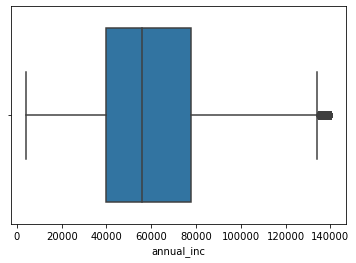

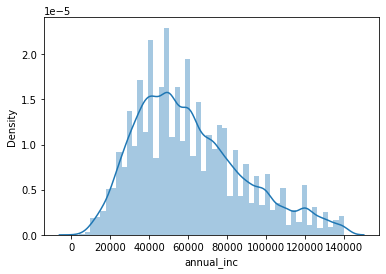

In [110]:
##Univariate Analysis on Annual income.
sns.boxplot(data["annual_inc"])
plt.show()
sns.distplot(data.annual_inc)
plt.show()


-  From above boxplox and distplot we can clearly figure out that people who have annual income under 1,20,000 are more likely to apply for loan as compared to the people who have annual income more than 1,20,000.

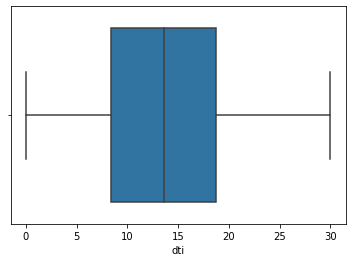

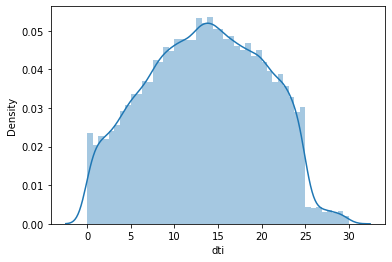

In [111]:
#checking outliers in dti 

sns.boxplot(data["dti"])
plt.show()

sns.distplot(data.dti)
plt.show()

There are no outliers in dti

<AxesSubplot:xlabel='loan_amnt'>

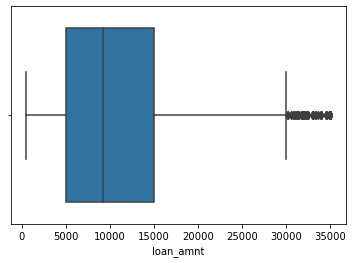

In [112]:
#checking for outliers in loan amount
sns.boxplot(data["loan_amnt"])

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

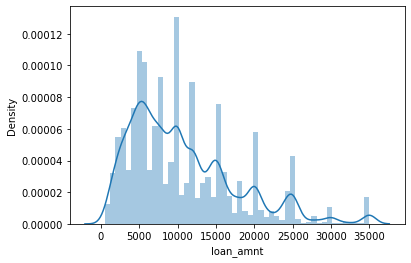

In [113]:
#plotting distplot for loan_amnt
sns.distplot(data["loan_amnt"])

-  Here we can see the loan amount is distributed so no need of removing outlier. Boxplot as well as distribution plot looks good. Values are not falling apart.

__Conclusion__:<br> 
1.The loan amount varies from 0 to 35,000<br>2.Loan amount is having a mean of somewhere around 10,000.



-  UNIVARIATE ANALYSIS on Loan status.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

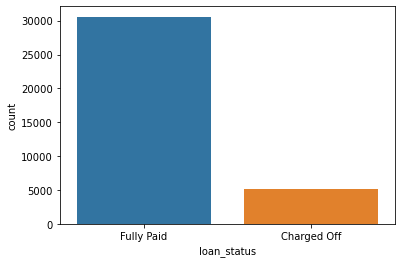

In [114]:
#Countplot of loan_status
sns.countplot(data["loan_status"])

In [115]:
data.loan_status.value_counts()

Fully Paid     30570
Charged Off     5224
Name: loan_status, dtype: int64

-  Conclusion:  <br>1.Most of the Loans are Fully paid.<br>2.17% fall under defaulters as they are charged off.<br>3.Class is imbalance.

-  UNIVARIATE ANALYSIS on Grade.

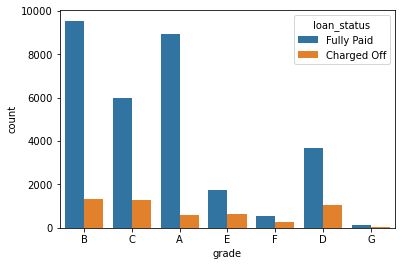

In [116]:
#countplot for grade vd loan_status
sns.countplot(data["grade"],hue=data['loan_status'])
plt.show()

-  Conclusion:  - <br>1.Most of the loans are high graded loans since they fall under A and B.

-  UNIVARIATE ANALYSIS on Employee Length.

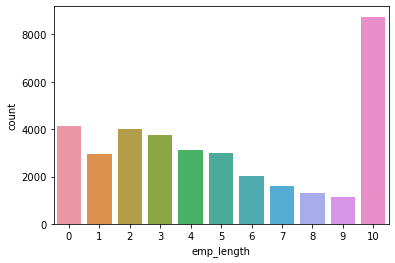

In [117]:
#countplot for emp_length
sns.countplot(data["emp_length"])
plt.show()

-  Conclusion:  <br>1.Majority of employees applying for loan have experience of 10 and more years.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

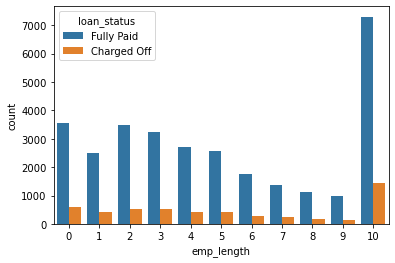

In [118]:
#countplot for emp_length vs loan_status
sns.countplot(data = data, x = "emp_length", hue = "loan_status" )

<AxesSubplot:xlabel='emp_length'>

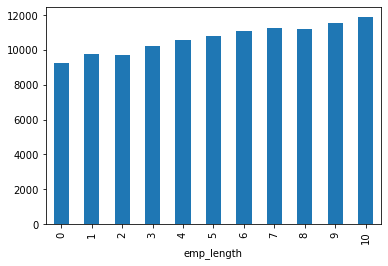

In [119]:
#plotbar for emp_length vs loan_status
data.groupby(["emp_length"])["loan_amnt"].mean().plot.bar()

-  Conclusion:  <br>1.Since Majority of people applying for loan are having a work experience of more than 10 years the count of getting charged off is more for these people.<br>2.Customers falling under the category of more than 10 years apply for maximum loan amount.

__"Visualizing categorical Data"__
<br><br>
-  We already have a grade column, so for "sub grade" column we will extract only int level value. 

In [120]:
#Extracting numeric values
data.sub_grade = pd.to_numeric(data.sub_grade.apply(lambda x: x[-1]))

In [121]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,13648,83.7,9,INDIVIDUAL,0,0,0.0,0.0,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,1687,9.4,4,INDIVIDUAL,0,0,0.0,0.0,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,2956,98.5,10,INDIVIDUAL,0,0,0.0,0.0,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,5598,21.0,37,INDIVIDUAL,0,0,0.0,0.0,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,7963,28.3,12,INDIVIDUAL,0,0,0.0,0.0,2011


__"MULTIVARIATE ANALYSIS"__<br>
-  Lets try to plot a countplot using "grade" , "sub_grade" on 'Charged Off' as well as 'Fully Paid'.

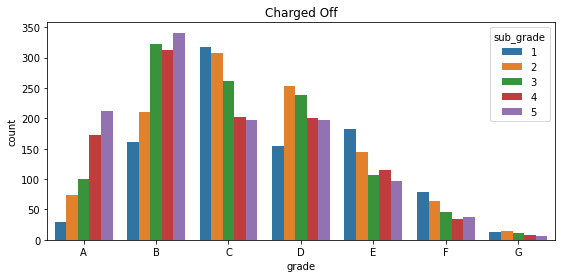

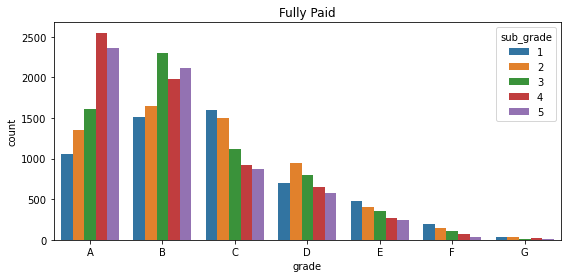

In [122]:
#countplot for grade vs subgrade vs charged off
plt.figure(figsize = [20,4])
plt.subplot(1,2,1)
plt.title('Charged Off')
sns.countplot(x = 'grade',order = ['A','B','C','D','E','F','G'], hue = 'sub_grade', data = data[data.loan_status == 'Charged Off'])

plt.figure(figsize = [20,4])
plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.countplot(x = 'grade',order = ['A','B','C','D','E','F','G'], hue = 'sub_grade', data = data[data.loan_status == 'Fully Paid'])

plt.show()

<AxesSubplot:xlabel='grade', ylabel='count'>

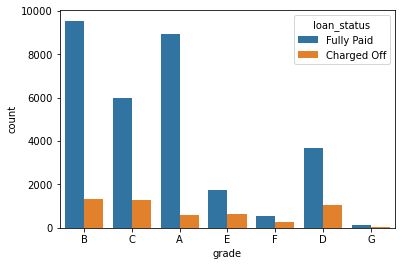

In [123]:
sns.countplot(data = data, x = "grade", hue = "loan_status" )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

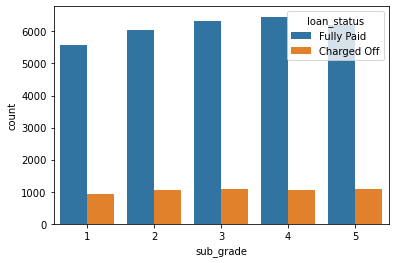

In [124]:
sns.countplot(data = data, x = "sub_grade", hue = "loan_status" )

-  Conclusion:  <br>1.Customer who fall under "B grade" is more likely to "Charged Off".<br>2.Customer with "A grade" is more likely to pay the loan comparatively.

-  __"BIVARIATE ANALYSIS"__ using Home ownership & Loan status.

In [125]:
data['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

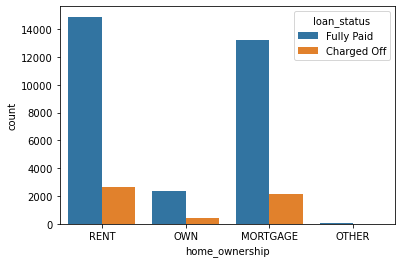

In [126]:
sns.countplot(data = data, x = "home_ownership", hue = "loan_status" )

-  Conclusion:  <br>1.Customer with "Rent" Home ownership is more likely to Charged off.<br>2.Customer with "Own" Home ownership is less likely to charged off.

-  __"BIVARIATE ANALYSIS"__ using Purpose & Loan status.

In [127]:
data["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

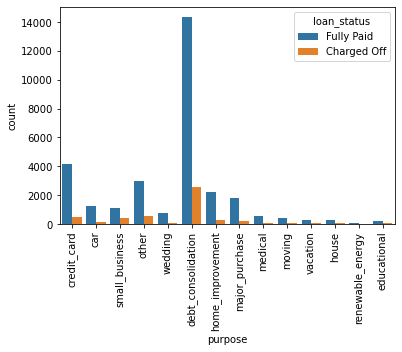

In [128]:
sns.countplot(x='purpose', hue="loan_status", data=data)
plt.xticks(rotation=90)
plt.show()


-  Conclusion:  <br>1.Majority of customers who apply for loan fall under the purpose of "debt_consolidation" and are more likely to get charged off.

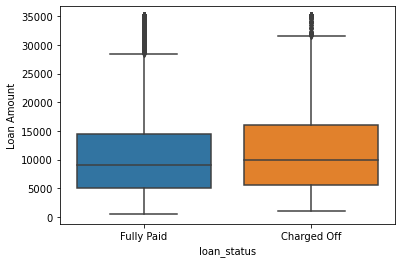

In [129]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=data)
plt.ylabel('Loan Amount')
plt.show()

-  Conclusion:<br>1.The mean for loan amount of charged off customers is more as compared to fully paid customers.

__"Segmented Analysis"__
<br>-  Creating bins for numerical variable to make them categorical.

In [130]:
data['int_rate'].describe()


count    35794.000000
mean        11.865474
std          3.633884
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         21.820000
Name: int_rate, dtype: float64

In [131]:
#creating bins for int_rate
data['int_rate_groups'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])


In [132]:
data["annual_inc"].describe()

count     35794.000000
mean      60869.688768
std       27680.479108
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77728.470000
max      140000.000000
Name: annual_inc, dtype: float64

In [133]:
#creating bins for annual_inc
data["annual_inc_groups"] = pd.cut(data["int_rate"],bins = 5, precision = 0, labels =["3k-31k","31k-58k","58k-85k","85k-112k","112k-140k"] )

In [134]:
data["open_acc"].describe()

count    35794.000000
mean         9.163519
std          4.319181
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [135]:
#creating bins for open_acc
data["open_acc_groups"] = pd.cut(data["open_acc"],bins = 5, precision = 0, labels = ["2-10","10-19","19-27","27-36","36-44"])

In [136]:
data['revol_util'].describe()


count    35794.000000
mean        48.678074
std         28.224296
min          0.000000
25%         25.300000
50%         49.100000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

In [137]:
#creating bins for revol_util
data['revol_util_groups'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])


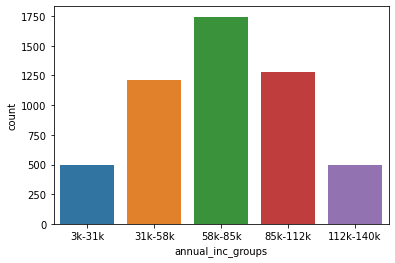

In [138]:
sns.countplot(x='annual_inc_groups', data=data[data.loan_status == 'Charged Off'])
plt.show()

-  Conclusion:<br>1. The customers having annual income between the range 58k to 85k are more likely to Charged off.

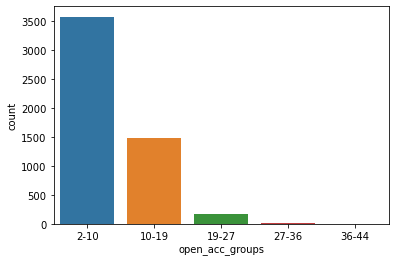

In [139]:
sns.countplot(x='open_acc_groups', data=data[data.loan_status == 'Charged Off'])
plt.show()


-  Conclusion:<br>1.Customers having open account between 2 to 1o are more likely to Charged Off.

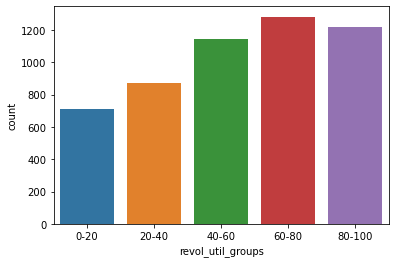

In [140]:
sns.countplot(x='revol_util_groups', data=data[data.loan_status == 'Charged Off'])
plt.show()

-  Conclusion:<br>1.Customers having revol util from 60 to 80 are more likely to Charged Off.

In [141]:
#creating bins for int_rate
data['int_rate_groups'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])


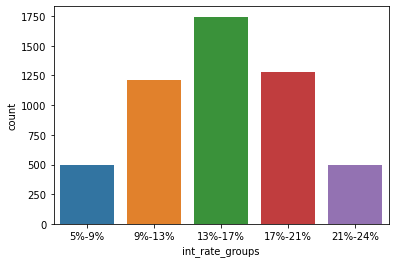

In [142]:
sns.countplot(x='int_rate_groups', data=data[data.loan_status == 'Charged Off'])
plt.show()


-  Conclusion:<br>1.Customers having loan interest rate between 13% to 17% are more likely to Charged Off.

In [143]:
#creating bins for loan amount
data['loan_amnt_groups'] = pd.cut(data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


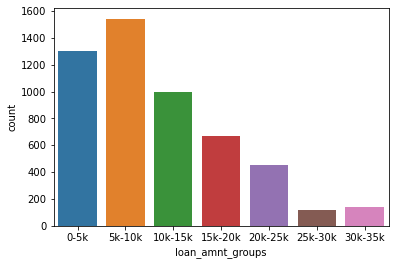

In [144]:
sns.countplot(x='loan_amnt_groups', data=data[data.loan_status == 'Charged Off'])
plt.show()

-  Conclusion:<br>1.Customers whose loan amount is between 5k to 10k are more likely to Charged off.

<AxesSubplot:xlabel='verification_status', ylabel='count'>

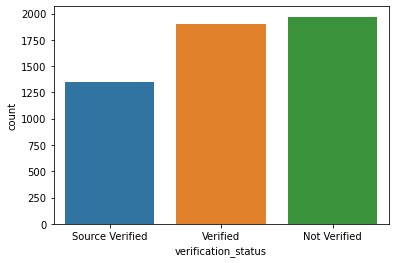

In [145]:
sns.countplot(x='verification_status', data=data[data.loan_status == 'Charged Off'])


-  Conclusion:<br>1.Customers having verification status not verified are more likely to charged off.

__"Bivariate Analysis"__ using joint plot

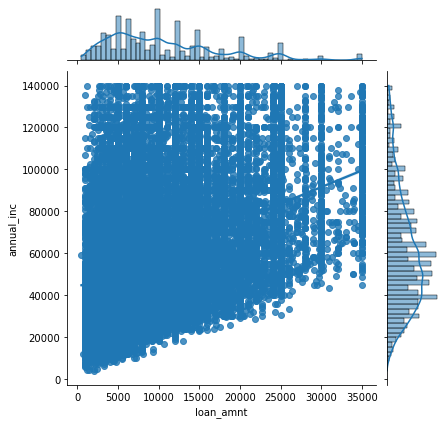

In [146]:
sns.jointplot(data.loan_amnt,data.annual_inc,kind="reg")
plt.show()

-  Conclusion:<br>1.From the above jointplot, we can see the correlation between annual salary and loan amount. As the annual Salary increases, the loan amount also increases.<br>2.Also we see a tapering pattern around mid-income segment, which suggests that people with mid-income level tend to take more loans.<br>3. Regression line is also indicating the fact that as the annual income increases the loan amount also increases.


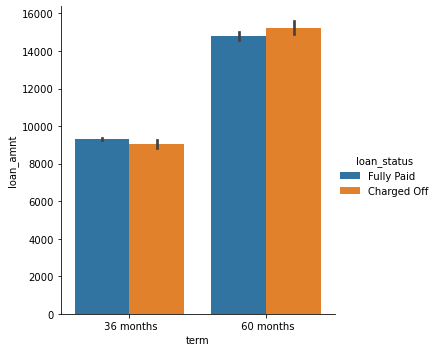

In [147]:
sns.catplot(x = 'term', y = 'loan_amnt', data = data,hue = 'loan_status', kind = 'bar')


-  Conclusion:<br>1.Customers having term of 60 months are more likely to Charged off.<br>2.Customers applying for long term have maximum amount of loan comparatively.

In [148]:
#Deriving new column for issue month
data['issue_month']=data['issue_d'].apply(lambda x:x[:3])
data['issue_month'].head()


0    Dec
1    Dec
2    Dec
3    Dec
5    Dec
Name: issue_month, dtype: object

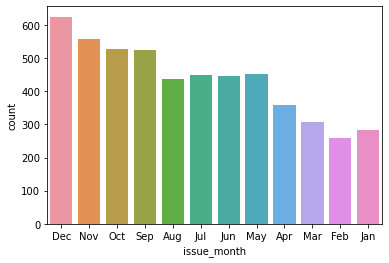

In [149]:
sns.countplot(x='issue_month', data=data[data.loan_status == 'Charged Off'])
plt.show()

-  Conclusion:<br>1.Customers those who issue for loan in december are more likely to fail in paying loan back and getting charged off.

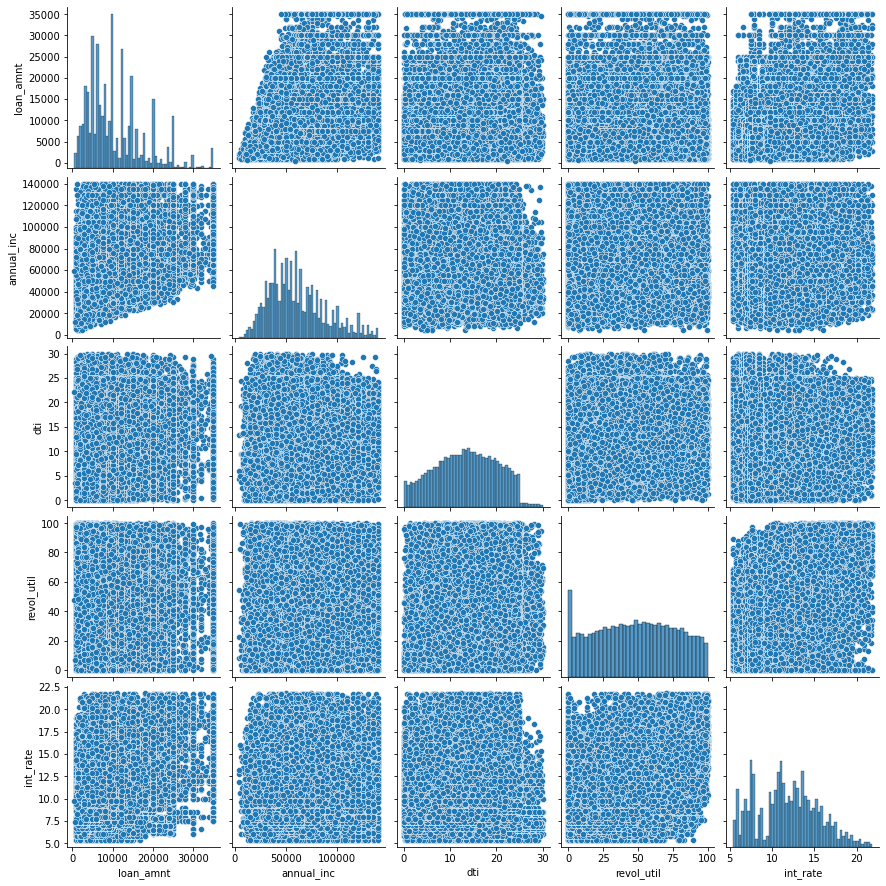

In [150]:
sns.pairplot(data[['loan_amnt','annual_inc','dti','revol_util','int_rate']])
plt.show()

<AxesSubplot:>

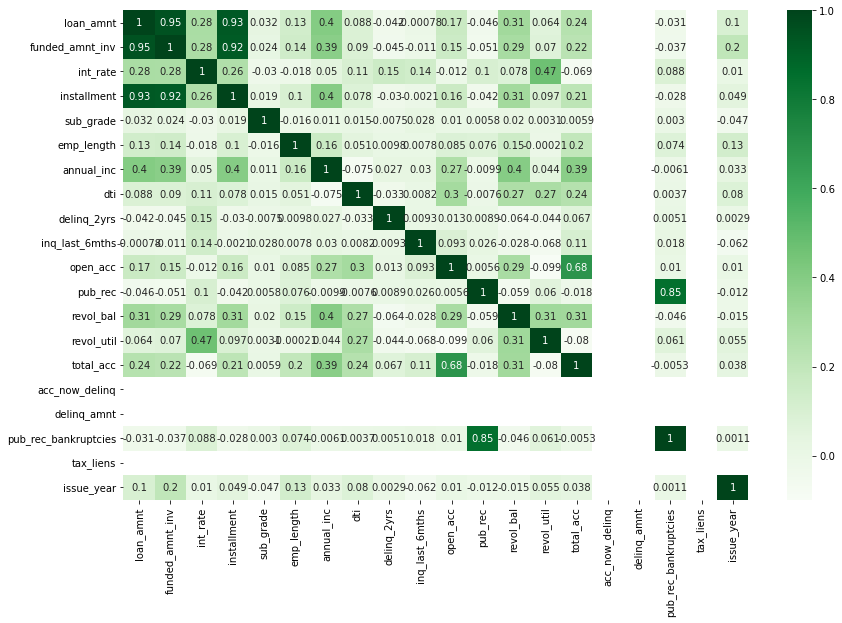

In [151]:
data1=data.corr()
plt.figure(figsize = [14,9])
sns.heatmap(data1, cmap = "Greens", annot = True)


<Figure size 1296x720 with 0 Axes>

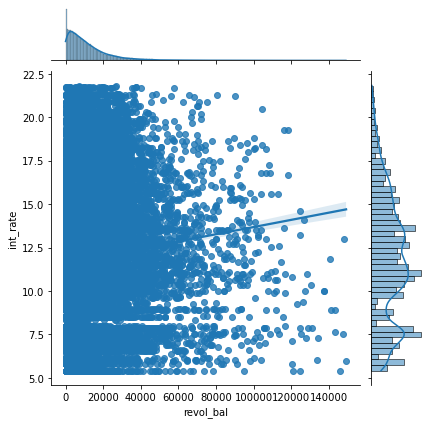

In [152]:
plt.figure(figsize=(18, 10))
sns.jointplot(data["revol_bal"], data["int_rate"],kind='reg')
plt.show()


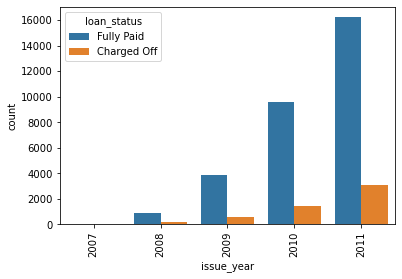

In [153]:
sns.countplot(x='issue_year', hue="loan_status", data=data)
plt.xticks(rotation=90)
plt.show()

-  Conclusion:<br>1.It can be seen that the number of customers opting for loans is increasing gradually and it peaked in the year 2011


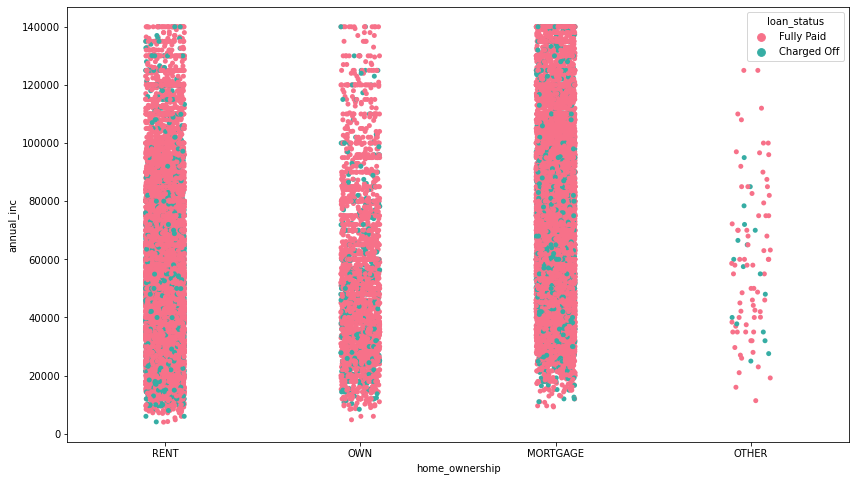

In [154]:
plt.figure(figsize=(14, 8))
sns.stripplot(y="annual_inc", x="home_ownership", hue="loan_status", data=data, palette="husl")
plt.show()

-  Conclusion:<br>1.The above figure shows the mid-income group whose loan is granted mostly to those customers who mortgage their home for the purpose of taking loans

__OBSERVATIONS:__<br>Probability of getting charged off is more in cases when:<br>1.Customers having work experience more than 10 years as they apply for maximum loan amount.<br>2.Customers who fall under Grade "B".<br>3.Customers with home ownership "Rent".<br>4.Customers applying loan and falling under the purpose of "Debt Consolidation".<br>5.Customers having annual income in range 58000 to 85000.<br>6.Customers having open account in range 2 to 10.<br>7.Customers having Revol Util in range 60 to 80.<br>8.Customers having loan interest in range 13% to 17%.<br>9.Customers having loan amount in 5000 to 10000.<br>10.Customers having verification status as not verified.<br>11.Customers having term of six months as they apply for maximum loan amount.<br>12.Customers those who issue for loan in December.